<a href="https://colab.research.google.com/github/AnaGutson/AlgebraII/blob/main/Redes_Neuronales_Ana_Gutson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tensor Flow**

Biblioteca que se utiliza para trabajar en ciencia de datos, en específico con redes neuronales.

Desarrollada por Google Brain.

Se utiliza en:
- Google Photos
- Google Search Engine
- Google Cloud Speech

Características:
- Soporte similar a NumPy con soporte específico para GPU!
- Compatible con computación distribuida.
- Incluya su propio compilador JIT (optimiza los calculos, descomponiendolos y ejecutandolos en paralelo).

Arquitectura:

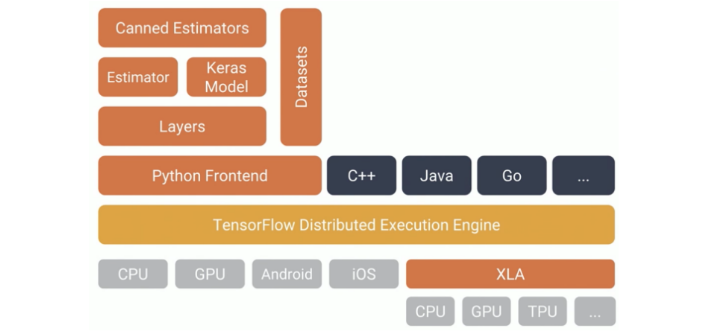

In [ ]:
import tensorflow as tf

**Constantes**

In [ ]:
#crear constante
a = tf.constant([2])
b = tf.constant([3])

matrix_one = tf.constant([[1,2,3],[2,3,4],[3,4,5]])
matrix_two = tf.constant([[2,2,2],[2,2,2],[2,2,2]])

#operaciones
suma = tf.add(a,b) #mismo que hacer a + b
mult = tf.matmul(matrix_one, matrix_two)
cuadrado = tf.square(matrix_one)

suma, a+b, mult, cuadrado

**Variables**

In [ ]:
#crear constante
v = tf.Variable([[1,2,3],[4,5,6]])

#cambios de la variable
v.assign(2*v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=int32, numpy=
array([[ 2,  4,  6],
       [ 8, 10, 12]], dtype=int32)>

Al realizar una operación, internamente Tensor Flow define un grafo.

Internamente no se va a ejecutar línea por línea (como se hace habitualmente), sino que primero se arma un modelo en memoria con todas las operaciones que se le indiquen.

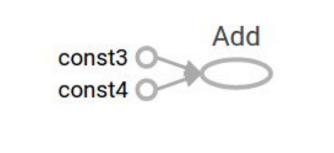

**Tensores**

Un tensor es una matriz de matrices.
Sin embargo, para Tensor Flow, todos son tensores. 

In [ ]:
Scalar = tf.constant([2])
Vector = tf.constant([5,6,2])
Matrix = tf.constant([[1,2,3],[2,3,4],[3,4,5]])
Tensor = tf.constant([ [[1,2,3],[2,3,4],[3,4,5]],
                       [[4,5,6],[5,6,7],[6,7,8]],
                       [[7,8,9],[8,9,10],[9,10,11]] ])

# **Redes Neuronales Superficiales**

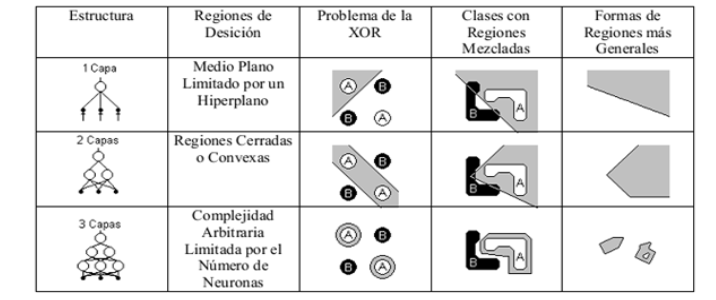

La mayoría son algoritmos supervisados.


**Funciones de activación. (entre otras)**

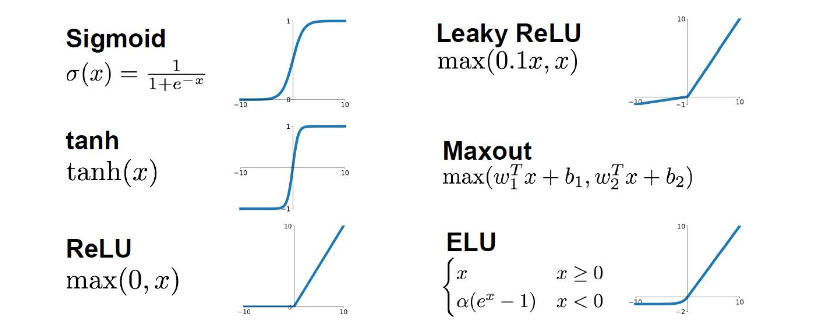

En general conviene normalizar los valores.
Si se normaliza:
- converge más rápido a la solución.
- puede llegar a una solución mejor.


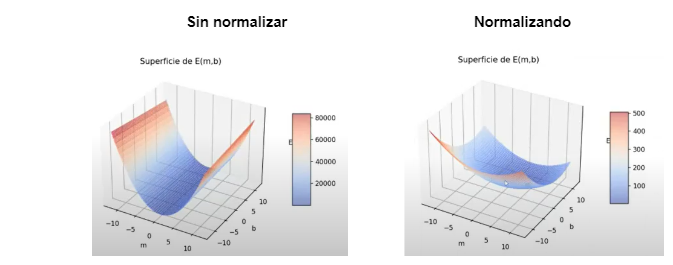

In [ ]:
columnas_predictoras=dataset_trabajo.columns.to_list()
columnas_predictoras.remove('target')

# Normalizo las variables de entrada
for col in columnas_predictoras:
    dataset_trabajo[col] =(dataset_trabajo.loc[:,col] -dataset_trabajo.loc[:,col].mean())/dataset_trabajo.loc[:,col].std()

## **Perceptrón Simple**

Modelo de red neuronal más sencillo.

Es de una neurona.


### **Funcionamiento**

Se tienen entradas, a cada una se la multiplica por un peso. Cada resultado obtenido se suma, y se le agrega además un umbral. Dicho resultado se le envía a la función de activación, la cual decide si la neurona se activa o no.

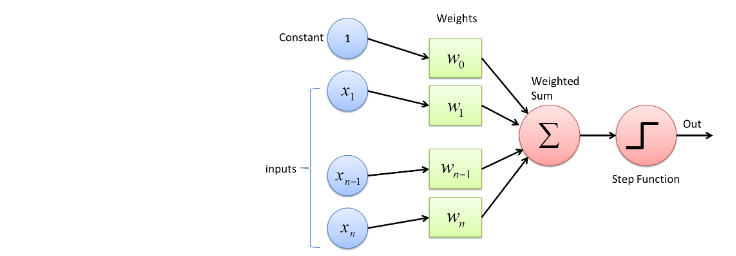

### **Funciones de activación**


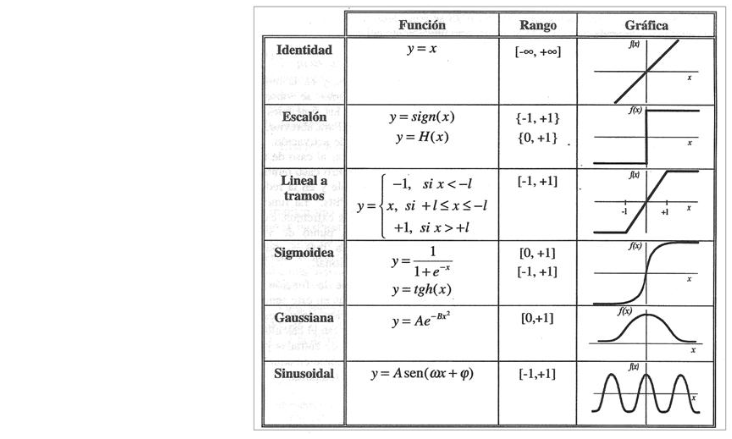

**Función escalón.**

Cualquier valor menor o igual a $0$ es $0$, sino es $1$.


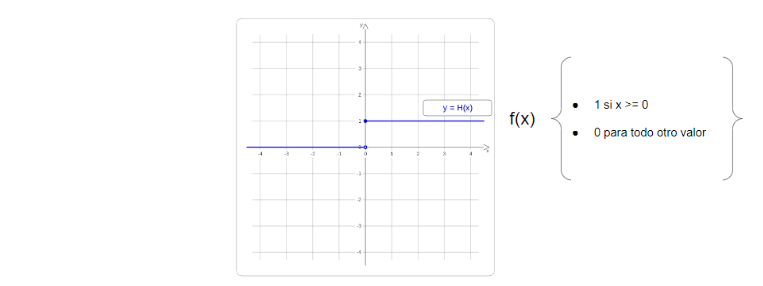

### **Ejemplo**

Quiero modelizar un AND, donde los datos son:


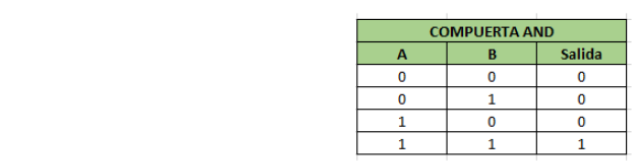

Por lo que se plantea lo siguiente:


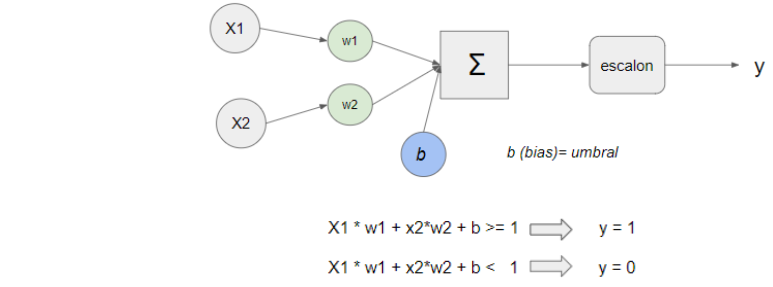

Se hacen las cuentas para cada combinación de $A$ y $B$:


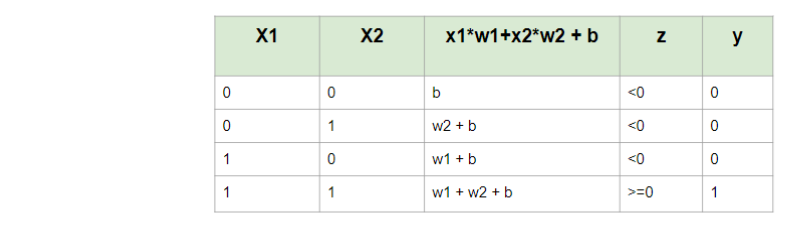

- Se eligen valores aleatorios de $w_1$, $w_2$ y $b$ (entre $0$ y $1$).
- Se hacen las cuentas a partir de estos valores aleatorios, prediciendo a partir de los resultados y comparando con el valor real. \\
Se tiene:
  - $z = $ resultado de la cuenta.
  - $y' = $ predicción.
  - $y = $ valor real.

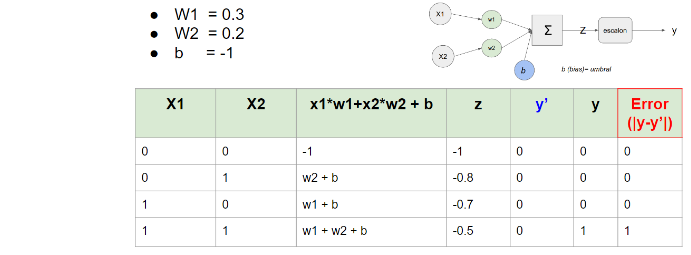

- Tengo un error así que grafico la función:

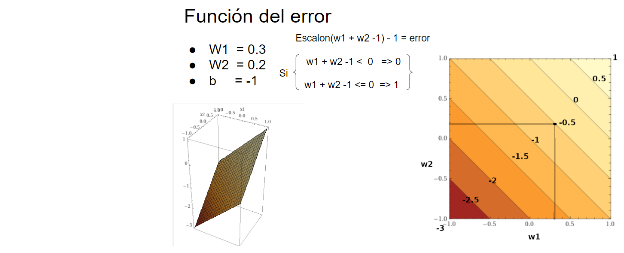

Le aplico la función escalón al gráfico:


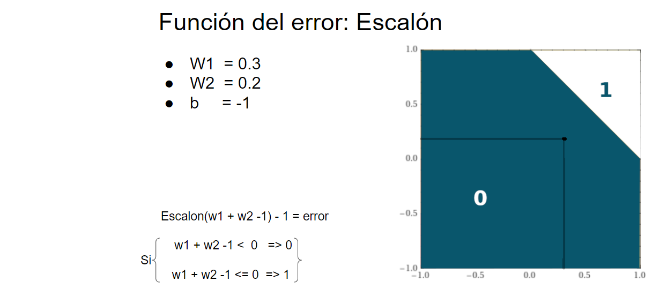

Sobre eso, le aplico la función error:

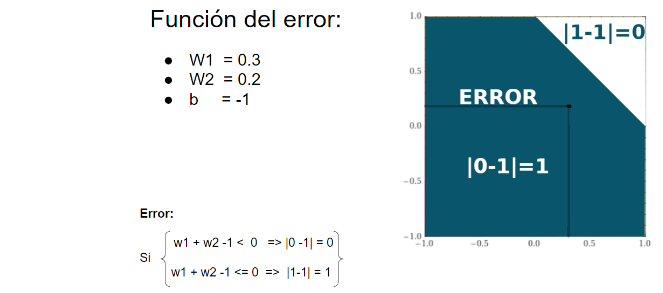

Hay que lograr acercarse a la zona blanca para lograr un error de $0$. Para esto se van a actualizar los pesos a partir de un parámetro $\alpha$: tasa de crecimiento. Es un valor entre $0$ y $1$, suele ser $0.5$

- Se actualizan los pesos con $\alpha = 0.2$. \\
Resulta: \\
$w_1 = 0.3 + 0.2 \times error,$ \\
$w_2 = 0.2 + 0.2 \times error,$ \\
$b = -1$, \\
siendo $error = 1$

- Se vuelven a hacer las cuentas:

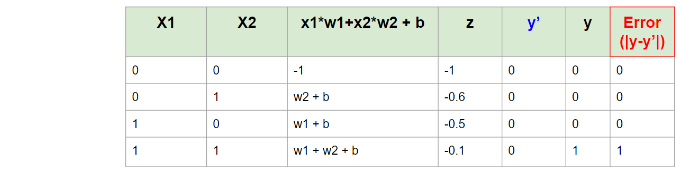

- Se continúa con la actualización de pesos hasta ya no tener un error.

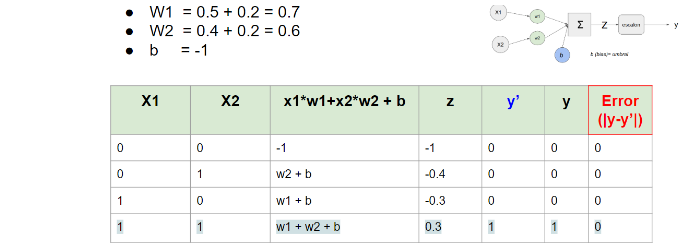

Finalmente ya se tiene una red neuronal entrenada que replica una compuerta AND.
Esta red neuronal funciona para los datos de entrenamiento y para cualquier conjunto nuevo de datos.

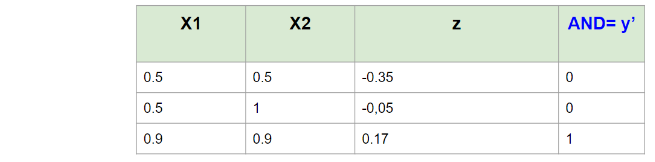

Geométricamente se puede pensar como un hiperplano en un espacio tetradimensional.

Si se ve en dos dimensiones, se puede pensar a la combinación de valores de A y B como coordenadas, y a la ecuación obtenida $(x_1 \cdot 0.7 + x_2 \cdot 0.6 - 1) $ como una recta que separa el espacio en dos partes:

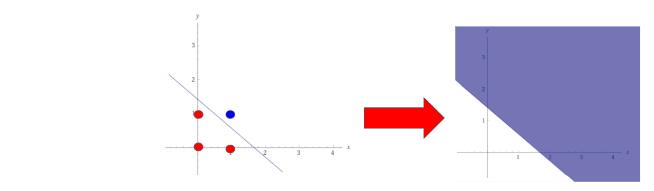

El modelo entrenado se representa con matrices de números flotantes.

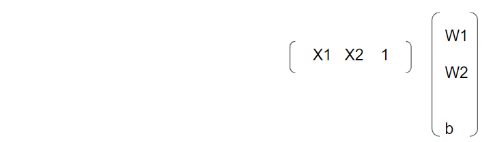

### **Limitaciones**

Solo sirve para problemas linealmente separables. Es decir, solo para problemas donde es posible trazar una linea y dividir el plano de tal forma que los conjuntos queden bien distribuidos (los rojos de un lado y los negros del otro).

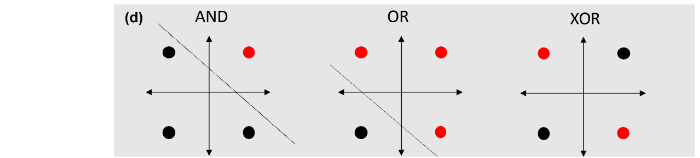

## **Perceptrón Multicapa**

Basicamente es una pila de perceptrones simples.

Se tiene una capa de entrada, $n$ capas ocultas y una capa de salida.

**Fully Connected**:
Cada neurona de una capa está conectada con todas las neuronas de la capa siguiente. Pero no está conectada con las neuronas de su misma capa, ni de 2 capas en adelante, ni de la capa de atrás.

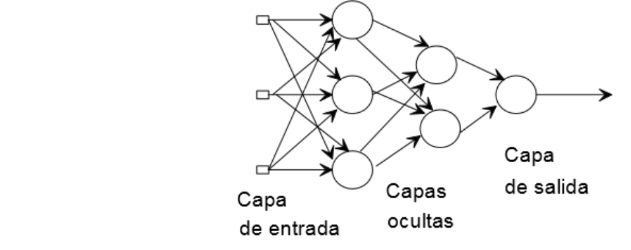

Se van a poder modelizar figuras complejas.

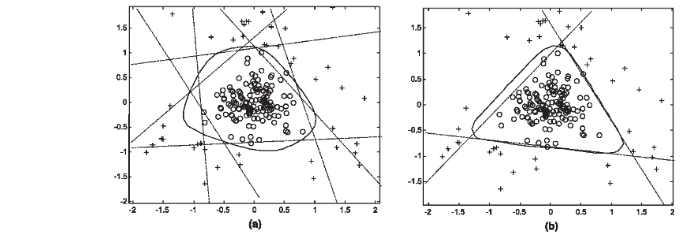

Cuanto más compleja la red (en capas o neuronas), más ciclos de entrenamiento se van a necesitar para llegar a la solución. 

**Funciones de activación.**

Se usa en la última capa cuando tengo una clasificación multi clase:
- **Regresión**: sigmoidea, lineal, ReLu, etc
- **Clasificación de clases excluyentes**: Sigmoidea \\
$\rightarrow$ se suele utilizar para representar un SÍ/NO.
- **Clasificación $N$ clases simultaneas**:
  - Softmax: para representar distintas categorías. Ejemplo: un libro que puede ser un poco de drama, y otro poco misterio.

No se puede utilizar la función de activación escalón ya que necesitamos que sea derivable y ésta no lo es.

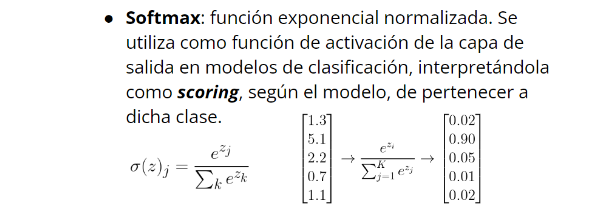

### **Backpropagation**

Algoritmo que se utiliza para entrenar redes neuronales. 

**Función de activación. Sigma:**
$$f(x) = \frac{1}{1+e^{-x}}$$


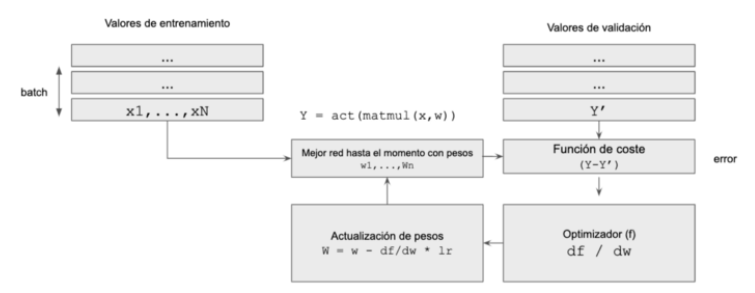

#### **Pasos**

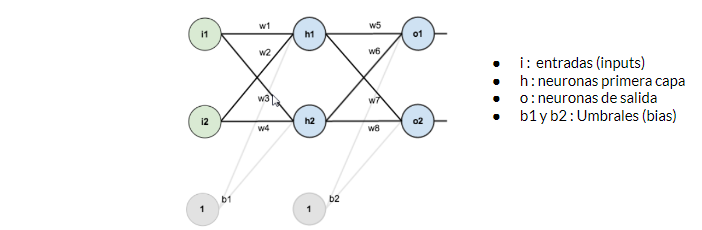

Se tienen las entradas y las salidas esperadas:


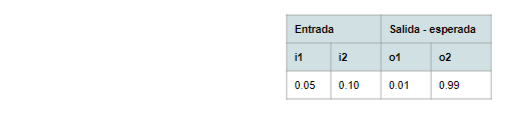

- Se tiene un modelo al que se le asignan valores al azar.


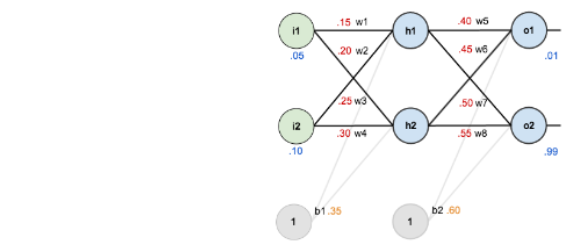

- Se calcula la entrada para $h_1$ a partir de los valores de entrada:
\begin{aligned}
net_{h_1} &= w_1 \cdot i_1 + w_2 \cdot i_2 + b_1 \cdot 1 \\
 &= 0.15 \cdot 0.05 + 0.2 \cdot 0.1 + 0.35 \cdot 1 \\
 &= 0.3775
\end{aligned}

- Se calcula la salida de $h_1$:
\begin{aligned}
out_{h_1} &= \frac{1}{1+e^{-0.3775}} \\
 &= 0.59327
\end{aligned}

- Se repiten los pasos para calcular la salida de $h_2$:
$$out_{h_2} = 0.59688$$

- Se repiten los pasos para calcular la salida de las neuronas de salida:
\begin{aligned}
net_{o_1} &= w_5 \cdot out_{h_1} + w_6 \cdot out_{h_2} + b_2 \cdot 1 \\
 &= 0.4 \cdot 0.59327 + 0.45 \cdot 0.59688 + 0.6 \cdot 1 \\
 &= 1.1059 \\
 \\
out_{o_1} &= \frac{1}{1+e^{-1.1059}} \\
 &= 0.75137 \\
 \\
\dots \\
\\
out_{o_2} &= 0.7729
\end{aligned}


- Se calcula el error cuadrático medio de cada neurona de salida:
$$E = \frac 12 (target - output)^2$$

Entonces,

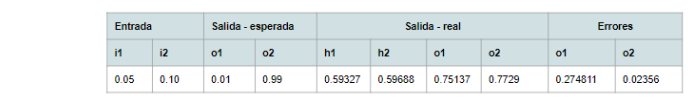

El error total es la suma de los errores
$$E_{total} = 0.29837$$

##### Se aplica **Backpropagation**

- Se calcula el gradiente del error total:
$$\overrightarrow \nabla E_{total} = (\frac{\partial E_{total}}{w_1}, \frac{\partial E_{total}}{w_2}, \frac{\partial E_{total}}{w_3}, \frac{\partial E_{total}}{w_4}, \frac{\partial E_{total}}{w_5}, \frac{\partial E_{total}}{w_6}, \frac{\partial E_{total}}{w_7}, \frac{\partial E_{total}}{w_8}).$$

La dirección de este vector apunta al máximo crecimiento de la función.

Entonces, a partir de esta información, el modelo va para el lado contrario (lado de decrecimiento).

Las derivadas parciales se calculan de atrás para adelante:

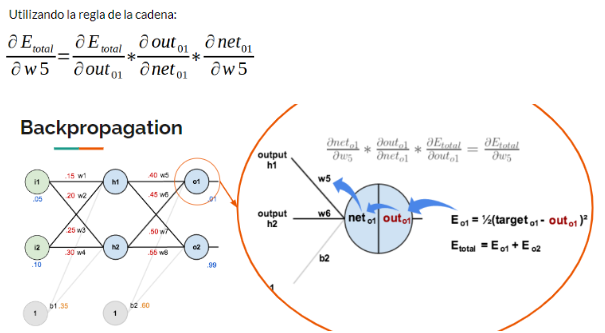

Entonces,
$$w_5' = w_5 -\alpha \cdot \frac{\partial E_{total}}{w_5}$$
con $\alpha =$ learning rate.

- Se aplica para todos los $w_i$.

Aparece un **desvanecimiento de gradiente**: a medida que se van calculando los menores $w_i$, el cambio es menor.

#### **Optimizadores**

Un optimizador es una **implementación concreta del algoritmo de backpropagation**.

Ordenados del menos al más sofisticado (utilizan otra información además del gradiente para modificar los pesos, como derivadas segundas), los optimizadores más utilizados son:
- SGD: Stochastic Gradient Descent.
- Momentum.
- Nesterov.
- RMSprop.
- AdaGrad.
- Adam.
- Nadam.

##### **Stochastic Gradient Descent**

**Backpropagation simple**, sin ningún tipo de optimización.

Para implementar SGD, en Keras, se tiene que usar el optimizador SGD.

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.001)

##### **Momentum**

Idea principal: Un cuerpo rígido rodando por una colina primero irá despacio, luego irá cada vez más rápido hasta alcanzar una velocidad final constante.

A diferencia del backpropagation tradicional, en donde **los pasos** son regulares aquí son **cada vez más rápidos**.

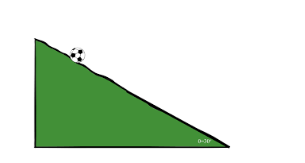

El gradiente se utiliza para la aceleración y no para la velocidad.

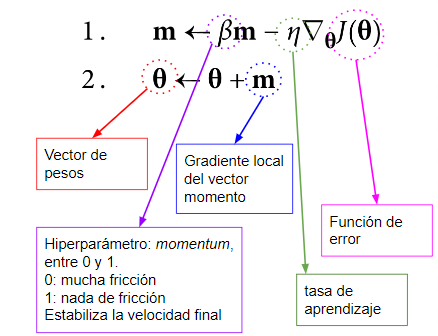

Para implementar Momentum, en Keras, se tiene que usar el optimizador SGD, con el hiperparámetro: momentum distinto de cero.

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

Lo **malo** es que añade un **nuevo hiperparámetro** que ajustar.


Lo **bueno** es que $0.9$ **suele funcionar bien** en la mayoría de los casos, **mejorando a Backpropagation tradicional**.


##### **Nesterov**

Propuesta por **Yurii Nesterov** en $1983$.


**Variante de Momentum**, en vez de calcular **el gradiente** del error en el punto actual, **lo calcula un poco más adelante** (en la dirección del momento): $θ + 𝛃 \cdot m$

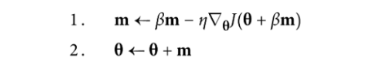

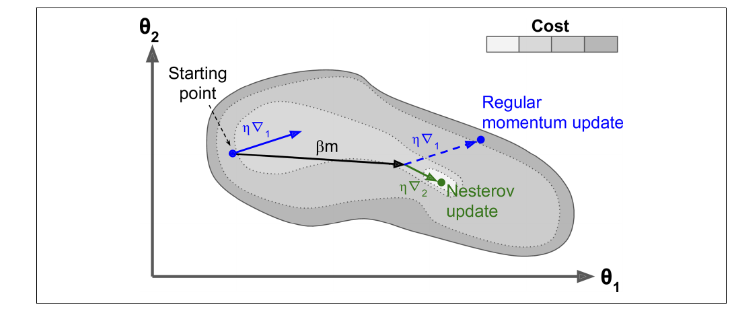

Suele **converger más rápido que Momentum**.

Para implementar Nesterov, en Keras, se tiene que usar el optimizador SGD, pero con la opción nesterov en True.

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

##### **AdaGrad**

Presentado por **John Duchi** y otros en $2011$.

Uno de los problemas de los otros métodos es que en $N$ dimensiones, el error descenderá por la dimensión con la pendiente más empinada, que no necesariamente será que conduzca al mínimo global.

Esto implica que hallará primero el mínimo local (más empinado) y luego irá lentamente hacia el mínimo global.

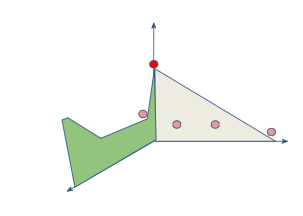

AdaGrad reduce el vector gradiente a lo largo de las dimensiones más empinadas.

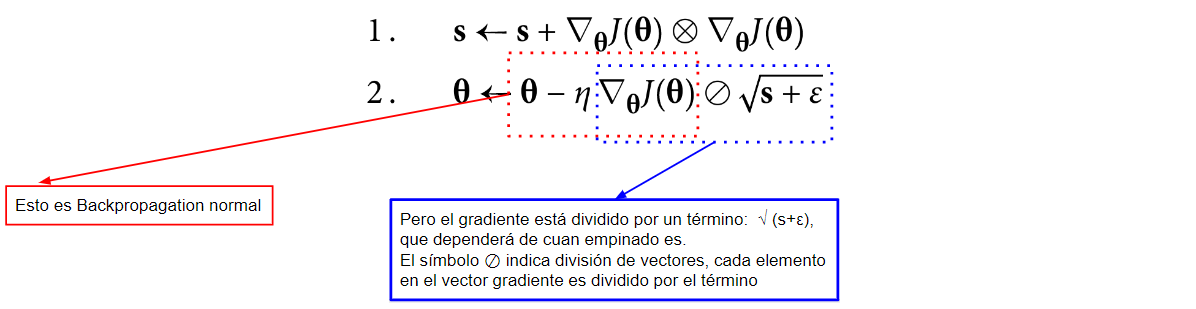

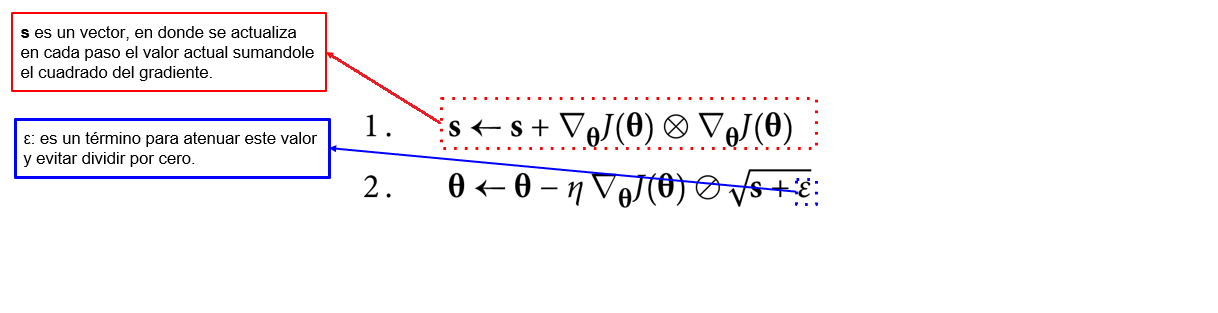

En otras palabras, cuanto más alto es el gradiente (la derivada), más empinada es la función de error en esa dimensión. Ya que el gradiente mide “la pendiente”.
Al dividir esta pendiente, por un valor proporcional a ella misma, se suaviza, y en todas las dimensiones el descenso por gradiente es similar, evitando caer en valles locales.

Ada no se desvía y corrige el rumbo hacia el mínimo global.

**Lo bueno:**

- Con frecuencia AdaGrad tiene un buen desempeño para problemas cuadráticos simples.
- Es bueno para tareas sencillas como regresión lineal.

**Lo malo:**

- A menudo se detiene demasiado pronto cuando entrena redes neuronales. Muchas veces se detiene antes de alcanzar el mínimo global.
- No debería usarse para entrenar redes profundas.

**Sirve para entender cómo funcionan otro métodos más complejos.**

$→$ No usar.

##### **RMSProp**

Creado por **Geoffrey Hinton** y **Tijmen Tieleman** en $2012$.

Soluciona el principal problema de AdaGrad al ir “olvidando” las pendientes anteriores, a medida que sigue avanzando. Es decir solo acumula los gradientes de las iteraciones más recientes.


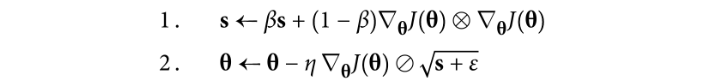

$𝛽$ es la tasa de decaimiento, y suele configurarse como $0.9$. Es un nuevo hiperparámetro, pero suele funcionar bien con este valor predeterminado.

En Keras:

In [ ]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

$rho = 𝛽$ 

RMSProp suele ser mejor que AdaGrad y era el preferido antes de que apareciese Adam.


##### **Adam**

Fue presentado en $2014$ por **Diederik P. Kingma** y **Jimmy Ba**.


Adam: **Ada**ptive **m**oment estimation.

**Combina** las ideas de **Momentum** y **RMSProp**.

Hace un seguimiento de una media de decaimiento exponencial de gradientes pasados y de gradientes cuadrados pasados.


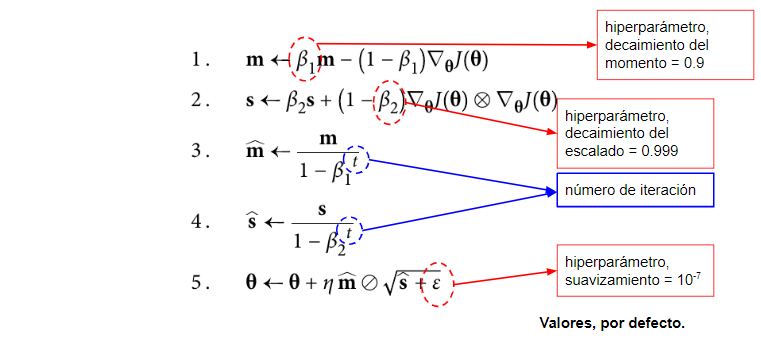

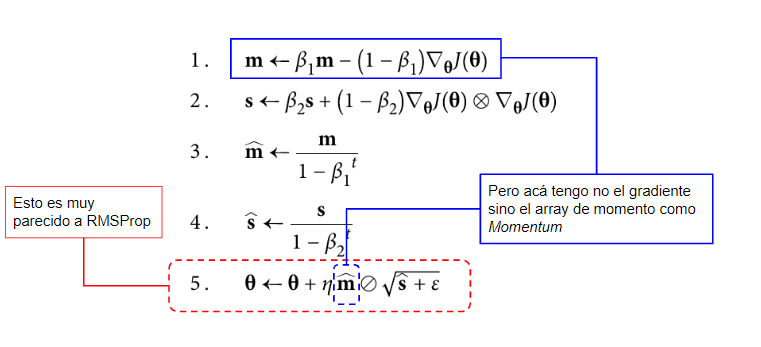

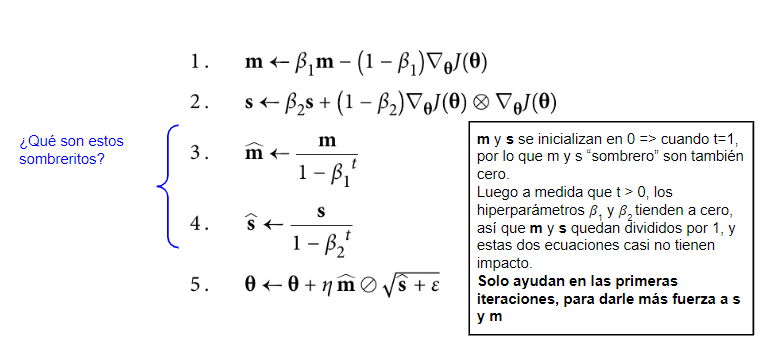

Para implementar Adam, en Keras, se tiene que usar el optimizador Adam:

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

##### **AdamMax**

**Modificación de Adam**.


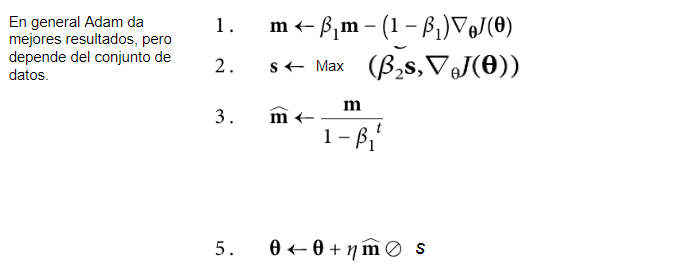

##### **Nadam**

Es **Adam + Nesterov**, así que a menudo c**onverge más rápido que Adam**.

##### **AdaDelta**

Es una **variación de AdaGrad** en la que en vez de calcular el escalado del factor de entrenamiento de cada dimensión, teniendo en cuenta el gradiente acumulado desde el principio de la ejecución, se restringe a una ventana de tamaño fijo de los últimos $n$ gradiente.

**Similar a RMSProp** que va olvidando los gradientes

### **Número de capas**

Para muchos problemas $1$ capa oculta será suficiente. En teoría un PMC con una sola capa oculta puede modelizar funciones complejas. Tendrá que tener neuronas suficientes.

Pero si se está ante problemas más complejos, las redes profundas tendrán mejor desempeño, ya que pueden modelizar mejor con menos neuronas totales.

#### **Ejemplo**

**MNIST**: números escritos a mano. 

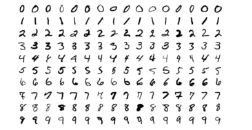

- $1$ capa oculta (cientos de neuronas) = $97\%$
- $2$ capas ocultas (mismo número de neuronas total) = $98\%$

Otros problemas como reconocimiento de imágenes o del discurso requieren decenas o cientos de capas, pero todas ellas conectadas como en PMC.

### **Número de neuronas por capa**

El número de neuronas de la capa de entrada y de salida está determinado por el problema a resolver:

#### **Ejemplo**

**MNIST**: números escritos a mano. 

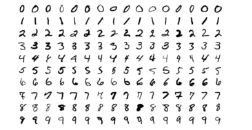

Cada número es una imagen de $28 \times 28$ píxeles $= 784$ neuronas de entrada.

Los dígitos a reconocer son los del sistema decimal tradicional. Así que son $10$, del $0$ al $9$. $10$ neuronas de salida.


Lo habitual es hacer una pirámide, poniendo cada vez menos neuronas.

Por ejemplo para MNIST, $3$ capas ocultas podrían tener: $300$, $200$ y $100$ neuronas cada una.

Sin embargo, últimamente se ha cuestionado esta técnica, ya que a veces poner la misma cantidad de neuronas en todas las capas da el mismo resultado o a veces mejor. 

### **Learning Rate**

Learning rate o tasa de aprendizaje: es el más importante, indica qué tan rápido se va desciendo en la función de costo.

Valores usuales: $E-01$ a $E-04$.


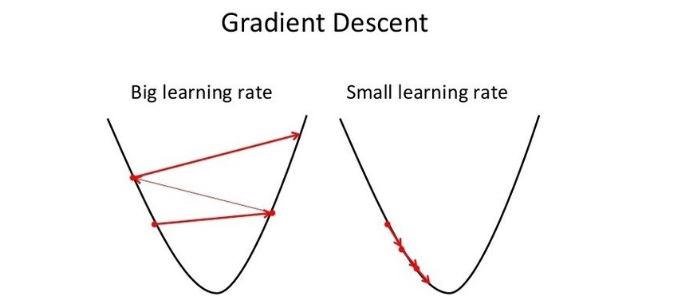

### **Problemas**

Si se tiene una red neuronal muy compleja, probablemente haya **overfitting**.

Solución: **Métodos de Regularización.**

Son métodos que ayudan a una mejor generalización, es decir, que el modelo funcione en datos que nunca vió. Los más usados son:
- Regularización L1 y L2.
- Dropout.
- Early stopping.
- Data augmentation.


#### **Regularización L1 y L2**

Penalizan el valor de los pesos de la red. Esto evita que se le dé más relevancia a una característica que a otra. Se le agrega un término en la función de costos proporcional a los pesos. 

Si es proporcional al módulo de los pesos se llama **regularización L1**, si es proporcional al módulo cuadrado se le llama **regularización L2**.

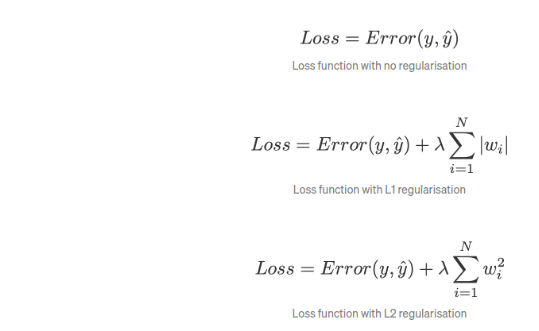

#### **Dropout**

Método de regularización que **evita codependencias en las conexiones de la red**. La idea es **“apagar” activaciones aleatoriamente** durante el entrenamiento. Esto hace que el buen funcionamiento de la red no dependa de unas pocas neuronas.

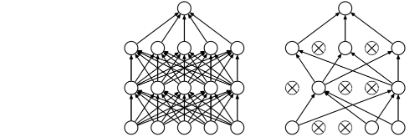

#### **Early stopping**

La idea es evitar el sobreajuste **parando el entrenamiento antes de que el error del set validación empieza aumentar**.

Este método busca entonces quedarse con los pesos en la instancia óptima.


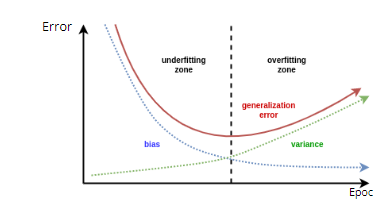

#### **Data augmentation**

La idea es **agregar datos usando los datos que se tienen y aplicarles transformaciones que los conviertan en nuevos datos**, de manera que sean verosímiles.

Es especialmente útil cuando se trabaja con imágenes. En general es difícil encontrar las transformaciones a aplicar.

Ejemplo:

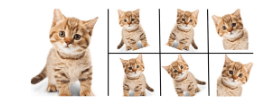

### **Simuladores**

[Ejemplo XOR](https://playground.tensorflow.org/#activation=sigmoid&regularization=L2&batchSize=30&dataset=xor&regDataset=reg-plane&learningRate=0.1&regularizationRate=0.003&noise=10&networkShape=4&seed=0.76427&showTestData=true&discretize=false&percTrainData=80&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&showTestData_hide=false)

[Ejemplo DONA](https://playground.tensorflow.org/#activation=sigmoid&regularization=L2&batchSize=30&dataset=circle&regDataset=reg-plane&learningRate=0.1&regularizationRate=0.003&noise=20&networkShape=4,3&seed=0.14921&showTestData=true&discretize=false&percTrainData=80&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&showTestData_hide=false)



##**Redes SOM (Kohonen)**

Se va a mapear un espacio de entrada a través de los pesos en una capa de salida que tiene varias neuronas de ancho y de alto.

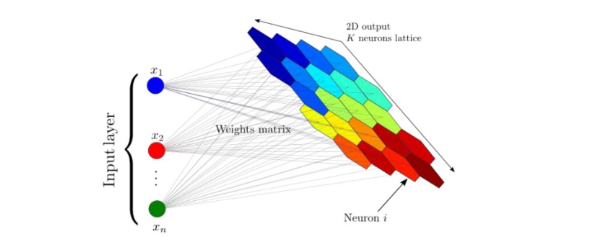

La idea es similar a K-means, en donde se dividen los datos por conjuntos con características similares.

En este caso, no se indica la cantidad de conjuntos a formar, ya que al tener $n \times n$ neuronas de salida, se van a ir mapeando los valores de entrada y agrupando de forma cercana unos a otros según sus similitudes.

Se tienen dos tipos de capas:
- **Visible Input Nodes**: capa de entrada
- **Visible Output Nodes (Map)**: capa de salida que representa una matriz

Una neurona de la capa de entrada conecta con una neurona de la capa de salida a través de sus pesos.

Es decir, la neurona $3$ conecta con la neurona $4$ a través del peso $w_{4,3}$.

A partir de esos pesos, se calcula la distancia entre los valores de entrada y los de salida.

Siendo $i$ el $n°$ de la neurona de la capa de entrada y $j$ el $n°$ de la neurona de la capa de salida  $$distancia(capa\_entrada, neurona\_capa\_de\_salida) = \sqrt{\sum_{i=1}^n{(x_i - w_{j,i})}^2}$$

Se mira la neurona con la menor distancia.

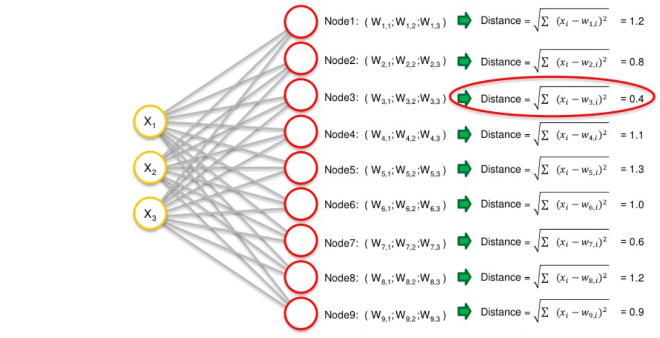

Es decir, en cada ciclo de entrenamiento se va a tener una sola neurona ganadora, que va a ser la que esté a la menor distancia del punto de entrada.

Existe un **área de vecindad** a partir de la cual se van a buscar todas las neuronas vecinas a esa y se les van a actualizar sus pesos.

Esa área va a ir disminuyendo a través del entrenamiento, hasta que sea cada vez más pequeña.

Finalmente, los datos se van a tener mapeados en diferentes áreas.

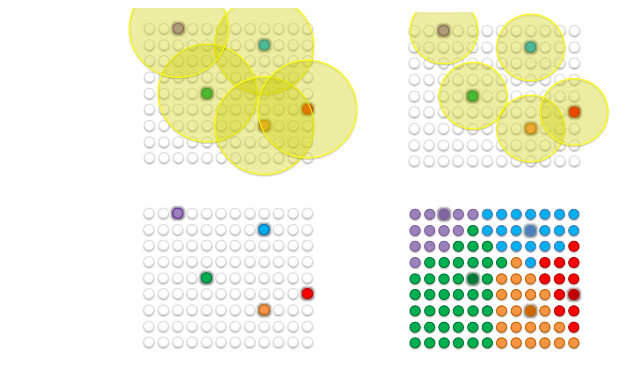

## **Código Perceptrón**

Entrenar la red neuronal requiere establecer:

Arquitectura $+$ Hiperparámetros $+$ Optimizador $+$ Función de pérdida $+$ Funciones de activación.



**Bibliotecas**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model
import visualkeras

np.random.seed(1)
tf.random.set_seed(1) 

### **Clasificación**

En este ejemplo se intenta predecir el target en función de dos features

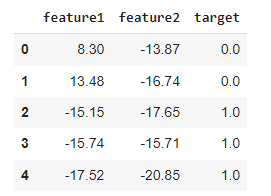

Se normalizan las variables

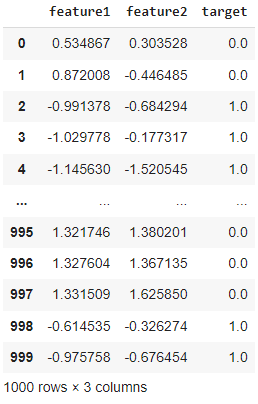

Creación y entrenamiento del modelo

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset_trabajo.loc[:,columnas_predictoras], dataset_trabajo.loc[:,'target'], test_size=0.8)

En este caso, los calculos de pesos a calcular por capa son:

- Para la primera capa, de $3$ neuronas:
  - Para cada neurona,
    - un peso por cada columna,
    - un bias por neurona.

Si se tienen $2$ columnas, entonces la primera capa requerirá de $(2 + 1) \cdot 3 = 9$ parámetros.

Cada neurona tendrá una salida, es decir que en total habrán $3$ salidas.

- Para la segunda capa, de $5$ neuronas:
  - Para cada neurona,
    - un peso por cada entrada (que corresponden a las $3$ salidas anteriores),
    - un bias por neurona.

Entonces, la segunda capa requerirá de $(3 + 1) \cdot 5 = 20$ parámetros.

Cada neurona tendrá una salida, es decir que en total habrán $5$ salidas.

- Para la última capa, habrá $2$ neuronas:
  - Para cada neurona,
    - un peso por cada entrada (que corresponden a las $5$ salidas anteriores),
    - un bias por neurona.

Entonces, la última capa requerirá de $(5 + 1) \cdot 2 = 12$ parámetros.

En total se necesitarán calcular $41$ parámetros.



In [ ]:
# calcula la cantidad de clases
classes=int(dataset_trabajo.loc[:,'target'].max()+1)

modelo = keras.Sequential([
    # input_shape solo en la primer capa
    # Capa con 3 salidas, activación relu
    keras.layers.Dense(3,input_shape=(d_in,), activation='relu'),
    # Capa con 5 salidas, activación tanh
    keras.layers.Dense(5, activation='tanh'),
    #la ultima capa si o si tiene que tener tantas salidas como clases, y softmax 
    keras.layers.Dense(classes, activation='softmax')])

modelo.summary()

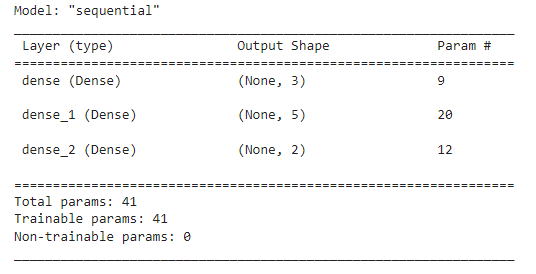

In [ ]:
plot_clasificador(modelo,x_train,y_train,title=f"Modelo inicial",detail=0.05)

In [ ]:
modelo.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.1), 
  loss='sparse_categorical_crossentropy', 
  metrics=['accuracy'], 
)

# Entrenamiento del modelo
history = modelo.fit(x_train,y_train,epochs=100,batch_size=8,verbose=False)

Este es el numero de veces que se ejecutaran los algoritmos de forwardpropagation y backpropagation. En cada ciclo (epoch) todos los datos de entrenamiento pasan por la red neuronal para que esta aprenda sobre ellos, si existen $10$ ciclos y $1000$ datos, cada ciclo los $1000$ datos pasaran por la red neuronal. Si se especifica el parametro batch size cada ciclo (epoch) tendra más ejecuciones internas, estas ejecuciones se llaman iteraciones, si tenemos un batch size de $100$, se tendran $10$ iteraciones para completar un ciclo, en cada iteración se ejecutan los algoritmos de forwardpropagation y backpropagation, de esta manera la red neuronal actualiza más veces los parametros W (pesos) y b (bias).

Para visualizar mejor:

In [ ]:
# imprime los puntos para un dataset junto con la frontera de decisión del modelo
def plot_clasificador(modelo, x, y,title="",detail=0.1):
   
    # nueva figura
    plt.figure()
    # gráfico con la predicción aprendida
    x_min, x_max = x.iloc[:, 0].min() - 1, x.iloc[:, 0].max() + 1
    y_min, y_max = x.iloc[:, 1].min() - 1, x.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, detail),
                         np.arange(y_min, y_max, detail))

    Z = np.c_[xx.ravel(), yy.ravel()]
    
    Z = modelo.predict(Z)
    Z = Z.argmax(axis=1) 
    titulo = f"{title}: regiones de cada clase"
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)  # ,  cmap='RdBu')
    plt.colorbar()
    plt.title(titulo)

    # puntos con las clases
    plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y)

In [ ]:
plot_clasificador(modelo,x_train,y_train,title=f"Modelo Final Train",detail=0.05)
plot_clasificador(modelo,x_test,y_test,title=f"Modelo Final Test",detail=0.05)

In [ ]:
y_pred = modelo.predict(x_test)

### **Regresión**

En este ejemplo se intenta predecir el consumo de un vehículo con base en la cantidad de caballos de fuerza.

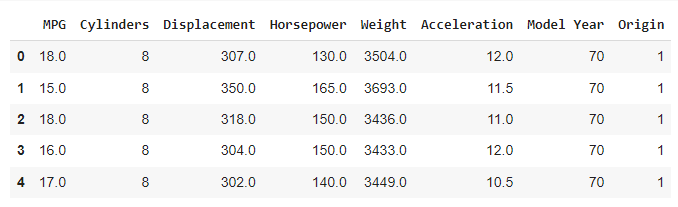

Se normalizan las variables

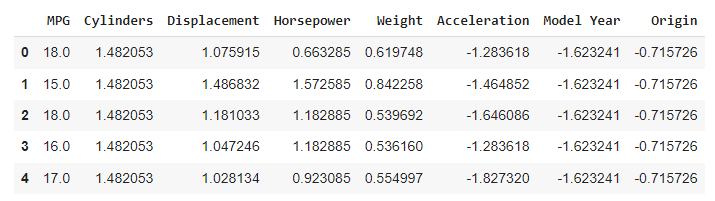

Creación y entrenamiento del modelo

In [ ]:
d_in=1
d_out=1
x_train, x_test, y_train, y_test = train_test_split(dataset_trabajo.loc[:,variable_predictora],dataset_trabajo.loc[:,'MPG'],test_size=0.2)

En este caso, los calculos de pesos a calcular por capa son:

- Para la primera capa, de $2$ neuronas:
  - Para cada neurona,
    - un peso por cada columna,
    - un bias por neurona.

Como se tiene $1$ columna, entonces la primera capa requerirá de $(1 + 1) \cdot 2 = 4$ parámetros.

Cada neurona tendrá una salida, es decir que en total habrán $2$ salidas.

- Para la segunda capa, de $2$ neuronas:
  - Para cada neurona,
    - un peso por cada entrada (que corresponden a las $2$ salidas anteriores),
    - un bias por neurona.

Entonces, la segunda capa requerirá de $(2 + 1) \cdot 2 = 6$ parámetros.

Cada neurona tendrá una salida, es decir que en total habrán $2$ salidas.

- Para la última capa, habrá $1$ neurona con:
  - un peso por cada entrada (que corresponden a las $2$ salidas anteriores),
  - un bias.

Entonces, la última capa requerirá de $(2 + 1) \cdot 1 = 3$ parámetros.

En total se necesitarán calcular $13$ parámetros.



In [ ]:
# Se crea un modelo Red Neuronal

modelo = keras.Sequential([
    # input_shape solo en la primer capa
    # Capa con 2 salidas, activación relu
    keras.layers.Dense(2,input_shape=(d_in, ), activation="relu"),
    # Capa con 2 salidas, activación tanh
    keras.layers.Dense(2, activation="tanh" ),
    keras.layers.Dense(d_out, )])

modelo.summary()

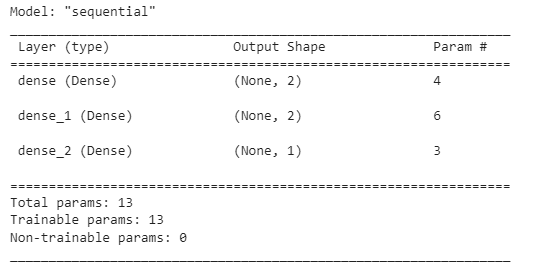

In [ ]:
plot_regression(modelo,x_train,y_train,title=f"Modelo inicial",xlabel="Horsepower",ylabel="MPG")

In [ ]:
modelo.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.001), 
  loss='mse', 
  # metricas para ir calculando en cada iteracion o batch 
  metrics=['mae'], 
)

# Entrenamiento del modelo
modelo.fit(dataset_trabajo.loc[:,variable_predictora],dataset_trabajo.loc[:,'MPG'],epochs=100,batch_size=16,verbose=False)

Este es el numero de veces que se ejecutaran los algoritmos de forwardpropagation y backpropagation. En cada ciclo (epoch) todos los datos de entrenamiento pasan por la red neuronal para que esta aprenda sobre ellos, si existen $10$ ciclos y $1000$ datos, cada ciclo los $1000$ datos pasaran por la red neuronal. Si se especifica el parametro batch size cada ciclo (epoch) tendra más ejecuciones internas, estas ejecuciones se llaman iteraciones, si tenemos un batch size de $100$, se tendran $10$ iteraciones para completar un ciclo, en cada iteración se ejecutan los algoritmos de forwardpropagation y backpropagation, de esta manera la red neuronal actualiza más veces los parametros W (pesos) y b (bias).

Para visualizar mejor:

In [ ]:
def plot_regression(modelo,x,y,title="",xlabel="x",ylabel="y"):
    plt.figure()
    
    plt.plot(x,y,"o",label="Valores verdaderos")
    plt.plot(x,modelo.predict(x),"x",label="Valores estimados")
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

In [ ]:
plot_regression(modelo,x_train,y_train,title=f"Modelo Final",xlabel="Horsepower",ylabel="MPG")
plot_regression(modelo,x_test,y_test,title=f"Modelo Final",xlabel="Horsepower",ylabel="MPG")

In [ ]:
y_pred=modelo.predict(x_test)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)

# **Redes de Aprendizaje Profundo**

El problema se segmenta para que cada capa atañe diferentes aspectos.


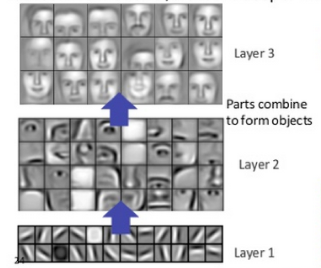

Se utiliza principalmente para la extracción de patrones:
  - procesamiento de texto,
  - reconocimiento de imágenes,
  - reconocimiento de objetos,
  - reconocimiento del habla. 

Redes de Aprendizaje Profundo:
- Autoencoders.
  - Restricted Boltzmann Machine.
  - Deep Belief Network.
- Redes Convolucionales.
- Redes Recurrentes.
- Redes Neuronales de Tensores Recursivas (RNTN).

## **Autoencoders**

Un autoencoder aprende a producir a la salida exactamente la misma información que recibe a la entrada. Es decir, la entrada y salida tienen igual número de neuronas.

Es un **compresor**:
 - **Reduce la dimensionalidad**.
 - **Elimina el ruido.** 

### **Restricted Boltzmann Machine**

**Geoff Hinton**, fue el **primero en encontrar una solución al problema de las redes de aprendizaje profundo**. Es considerado el **padre del Deep Learning**.

La idea es:
- ejecutar una entrada en sentido directo.
- hacer la ejecución en sentido inverso
- comparar con **KL Divergence** y ajustar pesos y bias, hasta que las salidas de la red invertida coinciden con las entradas, o se acercan lo más posible.



### **Deep Belief Nets**

Concebidas por **Geoff Hinton** como una alternativa al  backpropagation.

Es exactamente igual a un perceptrón multicapa, pero su método de entrenamiento es completamente diferente: se entrenan de a capas sucesivas con Restricted Boltzmann Machine.



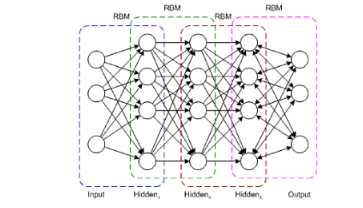

- Cada capa aprende el input entero (distinto a las redes convolucionales).

- Cuando el entrenamiento concluye, la red aprendió a detectar patrones inherentes en los datos, pero aún no se sabe nada acerca de esos patrones.

- Hay una segunda parte de entrenamiento supervisado. Pero con una cantidad pequeña de datos.

## **Redes Convolucionales**

Dominan completamente la visión espacial.

Desarrolladas por **Yann Lecun** of New York University. 

En $2015$, Microsoft, Google y Baidu lograron que una **computadora derrote a un humano** en un concurso de reconocimiento visual de objetos. La primera vez en toda la historia de IA.

**Convolución** es una manera de combinar dos funciones en una nueva. 

### **Funcionamiento**

Para analizar una imagen, lo primero que se va a hacer es imaginar que se tienen linternas y cada una ilumina una parte de la imagen.

Cada área está iluminada por varias linternas (**filtros** o **kernel**).

Existe cierta superposición pero se cubre la totalidad de la imagen.

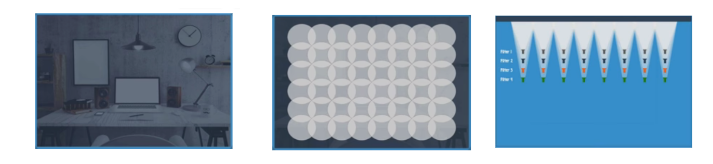

En esta **capa Convolucional**, cada neurona de entrada está conectada con los filtros. Los filtros no están conectados entre sí.

Básicamente matricialmente se trabajan los píxeles de entrada, se obtienen los pesos (matriz intermedia), se realiza la multiplicación y el resultado es el valor final (nuevo valor del pixel).


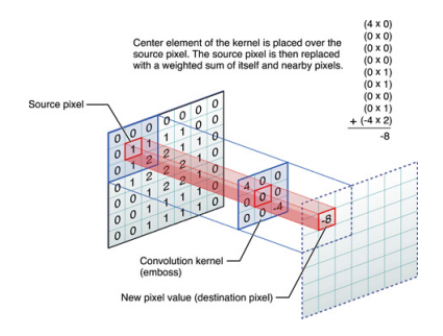


Luego va a haber **capas RELU** que se va a entrenar con BackPropagation.



Después va a haber **capas Pooling**, que reduce la dimensionalidad.

Hay dos maneras de hacer esto:
- **Max Pooling**: me quedo con el mayor valor de cada casillero.
- **Average Pooling**: me quedo con el promedio de cada casillero.



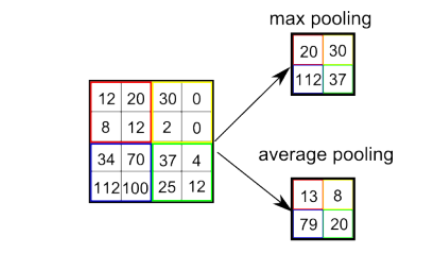


Por último se tiene una capa **Fully Connected** (perceptrón multicapa).

Las capas de tipo Convolucional, RELU y Pooling se pueden repetir varias veces, pero solamente va a haber una capa Fully Connected.

### **Código**

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop

Con `Sequential` se puede construir una arquitectura en la que se apilan capas de manera secuencial.

In [ ]:
model = Sequential()

Arquitectura a realizar:

> $In → \begin{bmatrix}(Conv2D → relu)\times 2 → MaxPool2D → Dropout\end{bmatrix} \times 2 → Flatten → Dense → Dropout → Out$

In [ ]:
#Inicialmente se indican las dimensiones del input

model.add(Conv2D(filters = 32,
                 kernel_size = (5,5),
                 padding = 'Same', #padding con 0's
                 activation = 'relu',
                 input_shape = (28, 28, 1)))

model.add(Conv2D(filters = 32,
                 kernel_size = (5,5),
                 padding = 'Same', #padding con 0's
                 activation = 'relu')) 

Se hace "max pooling".

In [ ]:
model.add(MaxPool2D(pool_size = (2, 2)))

Se agrega una capa de Dropout.

In [ ]:
model.add(Dropout(rate = 0.25)) # rate === fracción de neuronas a anularse

Se repite, pero esta vez reduciendo el tamaño del kernel en las capas de convolución a `(3x3)`

In [ ]:
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

In [ ]:
#se colocan los datos en un array
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.summary()

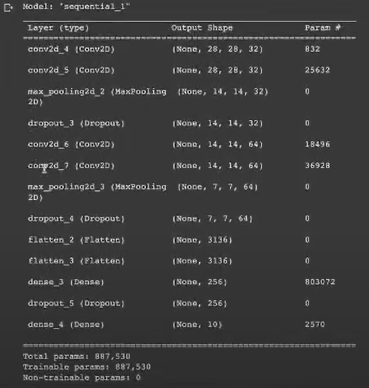

In [ ]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
epochs = 10 # Para mayor precisión, incrementar el número de epochs
batch_size = 86

❗ En Colab ir a "Edit" -> "Notebook settings" -> "Hardware acceleration" y habilitar el uso de la GPU! Acelera mucho el entrenamiento.

In [ ]:
history = model.fit(datagen.flow(training_digits, training_labels, batch_size=batch_size),
                              epochs = epochs, validation_data = (validation_digits, validation_labels),
                              verbose = 2, steps_per_epoch=training_digits.shape[0] // batch_size)

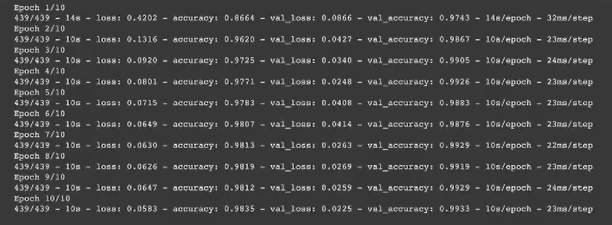

### **Entrenar YOLO**

Se instala lo requerido:

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!pip install -r requirements.txt  # install

%cd ..
!git clone https://github.com/juanma1982/deteccion-carteras
!ls

!pip install wandb

#Tests that we are using GPU
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.12.0+cu113 (Tesla T4)


Se hace **data augmentation**:

In [ ]:
import numpy as np
import imgaug as ia
import imageio as imageio
import imgaug.augmenters as iaa
import os
import copy
from pathlib import Path
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

def copy_and_load_bounding_boxes(imgObj, shape):
    boxes = []
    all_objs = copy.deepcopy(imgObj)
    for obj in all_objs:
        boxes.append(BoundingBox(x1 = obj["xmin"], x2 = obj["xmax"], y1 = obj["ymin"], y2 = obj["ymax"], label=obj["name"]))
    return BoundingBoxesOnImage(boxes, shape=shape)

# aug_id para agregarle al nombre de la img
def aug_image(img, aug_id = ""):
    image = imageio.imread(img["filename"])
    if image is None: print('Cannot find ', img["filename"])

    h, w, c = image.shape
    bbs = copy_and_load_bounding_boxes(img["object"], image.shape)

    seq = iaa.Sequential(
        [
            iaa.Fliplr(0.5), # horizontal flips
            iaa.Crop(percent=(0, 0.1)), # random crops
            # Small gaussian blur with random sigma between 0 and 0.5.
            # But we only blur about 50% of all images.
            iaa.Sometimes(
                0.5,
                iaa.GaussianBlur(sigma=(0, 0.5))
            ),
            # Strengthen or weaken the contrast in each image.
            iaa.LinearContrast((0.75, 1.5)),
            # Add gaussian noise.
            # For 50% of all images, we sample the noise once per pixel.
            # For the other 50% of all images, we sample the noise per pixel AND
            # channel. This can change the color (not only brightness) of the
            # pixels.
            iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
            # Make some images brighter and some darker.
            # In 20% of all cases, we sample the multiplier once per channel,
            # which can end up changing the color of the images.
            iaa.Multiply((0.8, 1.2), per_channel=0.2),
            # Apply affine transformations to each image.
            # Scale/zoom them, translate/move them, rotate them and shear them.
            iaa.Affine(
                scale=(0.8, 1.2),
                translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
                rotate=(-5, 5),
                shear=(-8, 8)
            )
        ],
        random_order=True
    )

    aug_image, aug_bbs = seq(image=image, bounding_boxes=bbs)
    aug_bbs = aug_bbs.remove_out_of_image().clip_out_of_image()
    # aug_image = aug_bbs.draw_on_image(aug_image) Testing purpouses only

    newFileName = Path(img["filename"]).stem + "-aug" + str(aug_id)
    splitted_name = os.path.splitext(img["filename"])
    aug_image_name = splitted_name[0] + "-aug" + str(aug_id) + splitted_name[1]
    
    aug_img_obj = {'object':[],'filename': aug_image_name, 'width': w, 'height':h, 'labelfilename':labels_dir + newFileName + ".txt"}
    for aug_bb in aug_bbs.bounding_boxes:
        obj = {}
        xmin, ymin, xmax, ymax = aug_bb.x1_int, aug_bb.y1_int, aug_bb.x2_int, aug_bb.y2_int
        obj["xmin"] = xmin
        obj["xmax"] = xmax
        obj["ymin"] = ymin
        obj["ymax"] = ymax
        obj["name"] = aug_bb.label
        aug_img_obj["object"].append(obj)

    #print(aug_img_obj)
    imageio.imwrite(aug_image_name, aug_image)
    return aug_img_obj

# Esta función crea archivos .txt que soporta yolov5 en base a los .XML 
def process_annotations(ann_dir, img_dir, labels=[]):
    all_imgs = []
    
    for ann in [x for x in sorted(os.listdir(ann_dir)) if x.endswith('.xml')]:
        img = {'object':[]}
        img['labelfilename'] = ann_dir + ann
        tree = ET.parse(ann_dir + ann)
        
        for elem in tree.iter():
            if 'filename' in elem.tag:
                img['filename'] = img_dir + elem.text
            if 'width' in elem.tag:
                img['width'] = int(elem.text)
            if 'height' in elem.tag:
                img['height'] = int(elem.text)
            if 'object' in elem.tag or 'part' in elem.tag:
                obj = {}
                
                for attr in list(elem):
                    if 'name' in attr.tag:
                        obj['name'] = attr.text
                        if len(labels) > 0 and obj['name'] not in labels:
                            break
                        else:
                            img['object'] += [obj]
                            
                    if 'bndbox' in attr.tag:
                        for dim in list(attr):
                            if 'xmin' in dim.tag:
                                obj['xmin'] = int(round(float(dim.text)))
                            if 'ymin' in dim.tag:
                                obj['ymin'] = int(round(float(dim.text)))
                            if 'xmax' in dim.tag:
                                obj['xmax'] = int(round(float(dim.text)))
                            if 'ymax' in dim.tag:
                                obj['ymax'] = int(round(float(dim.text)))

        if len(img['object']) > 0:
            all_imgs += [img]
                        
    return all_imgs

def get_class_index(obj, labels):
    return labels.index(obj['name'])

def create_txt_from_xml_labels(train_imgs, labels, number_of_augmentations = 1):
    train_augmented_imgs = []
    for img in train_imgs:
        if not os.path.isfile(img["filename"]):
            continue
        train_augmented_imgs.append(img)
        #augment data
        #train_agumented_imgs.append(aug_image(img))
        for i in range(0, number_of_augmentations):
            try:
              train_augmented_imgs.append(aug_image(img, i))
            except:
              print("error in image: ",img)            
            break            

    for img in train_augmented_imgs:
        txtFilePath = os.path.splitext(img["labelfilename"])[0] + ".txt"
        imgWidth = img["width"]
        imgHeight = img["height"]
        with open(txtFilePath, 'w') as writer:
            for obj in img['object']:
                objClassIndex = get_class_index(obj, labels)
                if objClassIndex < 0:
                    continue
                boxWidth = (obj['xmax'] - obj['xmin']) / imgWidth
                boxHeight = (obj['ymax'] - obj['ymin']) / imgHeight
                xCenter = ((obj['xmax'] + obj['xmin']) / 2) / imgWidth
                yCenter = ((obj['ymax'] + obj['ymin']) / 2) / imgHeight
                line = str(objClassIndex) + " " + str(xCenter) + " " + str(yCenter) + " " + str(boxWidth) + " " + str(boxHeight)
                writer.write(line + os.linesep)

**Preprocessing mate labels.**

Preprocessing de labels para red de detección de carteras unicamente.

In [ ]:
import os
import xml.etree.ElementTree as ET
%cd /content/yolov5
labels_dir = "../deteccion-carteras/labels/carteras/" # directorio que contiene los xml
img_dir = "../deteccion-carteras/images/carteras/"    # directorios con las imagenes
#labels = ['cartera', 'plastico', 'calabaza', 'metal', 'madera']
labels = ['cartera']

# Procesar .xml a objetos 
train_imgs = process_annotations(labels_dir, img_dir, labels)
# Crear .txt para cada objeto
create_txt_from_xml_labels(train_imgs, labels, 3)

/content/yolov5
error in image:  {'object': [{'name': 'cartera', 'xmin': 6, 'ymin': 49, 'xmax': 1129, 'ymax': 918}], 'labelfilename': '../deteccion-carteras/labels/carteras/tjshiao-08.xml', 'filename': '../deteccion-carteras/images/carteras/tjshiao-08.jpg', 'width': 1132, 'height': 918}
error in image:  {'object': [{'name': 'cartera', 'xmin': 8, 'ymin': 139, 'xmax': 471, 'ymax': 824}], 'labelfilename': '../deteccion-carteras/labels/carteras/tjshiao-09.xml', 'filename': '../deteccion-carteras/images/carteras/tjshiao-09.jpg', 'width': 508, 'height': 844}
error in image:  {'object': [{'name': 'cartera', 'xmin': 93, 'ymin': 59, 'xmax': 603, 'ymax': 936}], 'labelfilename': '../deteccion-carteras/labels/carteras/tjshiao-10.xml', 'filename': '../deteccion-carteras/images/carteras/tjshiao-10.jpg', 'width': 746, 'height': 1000}


**Create dataset yaml.**

Crear el .yaml usado por yolo para carteras únicamente. Se usa autosplit para dividir los datos en train/validation utilizando la regla 80/20.

In [ ]:
import os

#autosplit(img_dir, (0.8, 0.2, 0))

with open("dataset.yaml", "w") as dataset:
    dataset.write("train: " + img_dir + os.linesep)
    dataset.write("val: " + img_dir + os.linesep)
    dataset.write("nc: " + str(len(labels)) + os.linesep)    
    dataset.write("names: " + str(labels) + os.linesep)

**Train.**

Entrenamiento para detectar carteras unicamente.

In [ ]:
!python train.py --img 416 --batch 32 --epochs 100 --cfg yolov5s.yaml --data dataset.yaml --weights 'yolov5s.pt' --nosave --cache

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=416, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.93

## **Redes Recurrentes**

Estas redes existen hace mucho tiempo pero han ganado popularidad recientemente gracias al trabajo de: **Jürgen Schmidhuber**, **Sepp Hochreiter** y **Alex Graves**.

Son redes que **se retroalimentan**.

Son **útiles** cuando los patrones en los **datos cambian con el tiempo**.

Sirven para:

- Capturar imágenes
  - Entrada: singular.
  - Salida: secuencia.   
- Clasificar documentos.
  - Entrada: secuencia.
  - Salida: singular.
- Clasificar videos cuadro a cuadro:
  - Entrada: secuencia.
  - Salida: secuencia.

Si se introduce una pequeña demora, la red puede de forma estadística, **predecir** la demanda en una cadena de suministros.

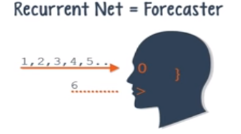

**Problemas de entrenamiento**: el problema del desvanecimiento del gradiente es exponencialmente peor. Una sola capa con $100$ pasos temporales es como entrenar una red de $100$ capas de alimentación hacia adelante.

Para solucionarlo, se utilizan **optimizadores**:
  - Gating:
  
  $\rightarrow$ Le dice a la red cuando olvidar el input y cuando recordarlo.

  - LSTM 
  - GRU 
  - Gradient Clipping
  - Better Optimizers
  - Steeper gates

## **Redes Neuronales de Tensores Recursivas**

Creadas por **Richard Socher** de MetaMind.

Se utilizan, principalmente, para realizar tareas de análisis de sentimiento, teniendo en cuenta el orden y la agrupación sintáctica. También se puede utilizar para detectar componentes en imágenes.

Tienen **estructura de árbol**, con neuronas raiz y neuronas hojas.

El nodo raíz genera un “score” que es vuelto a ingresar en los nodos hojas de forma recursiva.

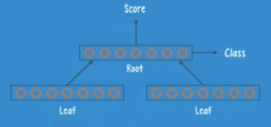

### **Funcionamiento**

Se quiere analiza sintácticamente **"the car is fast"**.

Se ingresan las primeras dos palabras a las neuronas hojas, y a partir de sus outputs, la neurona raíz genera un score.

Se vuelve a ingresar información a las neuronas hojas: el score obtenido y la siguiente palabra.

Así sucesivamente hasta terminar de recorrer las palabras.

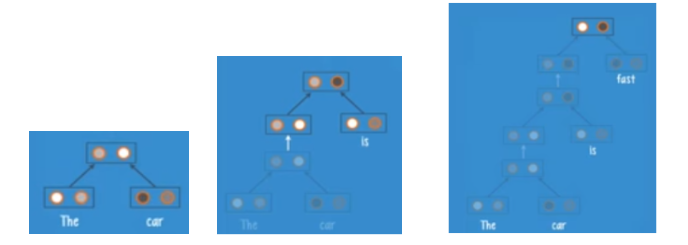

**Etiquetamiento gramatical.**

Una vez que la red obtuvo el mejor parser, vuelve sobre sus pasos (**backtracks**) a través del parser para obtener las etiquetas gramaticales.


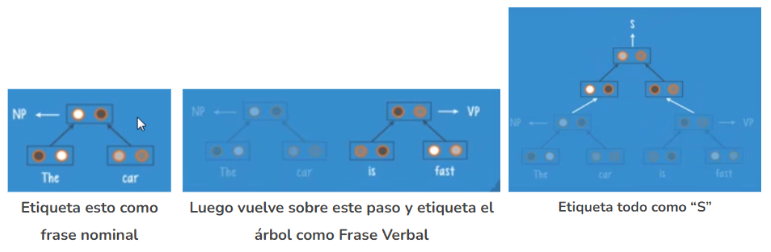

Este tipo de redes utilizan BackPropagation. Para ello comparan el árbol de dependencias obtenido con un árbol de dependencias generado a mano para una misma oración de entrada.


## **Deep Fake Nets**

Presentado como Harmonium por **Paul Smolensky** en $1986$.

**Crea imágenes y vídeos**.

Se suele usar para colocar la cara de un famoso en otro cuerpo.

Utiliza **Restricted Boltzman Machines**.

**Pasos.**

- Se entrena un autoencoder para la cara $1$. Es decir, que devuelva lo mismo que le ingresó.
- Se entrena otro autoencoder para la cara $2$.
- Se combina el primer encoder con el segundo decoder.




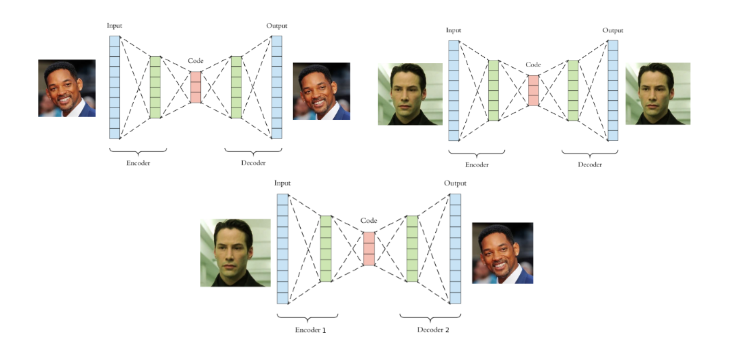

## **Generative Adversarial Networks (GAN)** 

**Crean imágenes que no existen**.

Se suelen usar para [crear caras](https://thispersondoesnotexist.com/) o [cualquier otra cosa](https://thisxdoesnotexist.com/).

**Características.**
- Son redes NO-Supervisadas.
- No arman clusters.
- No clasifican datos.
- No resuelven problemas de regresión.
- **Generan nuevos datos**.

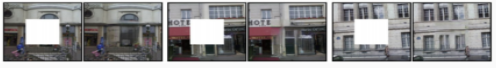

**Funcionamiento.**

- Se toman imágenes reales.
- Se hace downscaling (se reduce la dimensionalidad).
- Una red convolucional determina si la imagen es real o no.
- A la red también le ingresa una imagen random (que no es real), la cual determina que es falsa (con cierto loss).
- A partir de esa salida, se retroalimenta el generador de imágenes falsas (para generar imágenes más realistas), y también la misma red (para poder determinar mejor si una imagen es real o falsa). 

El proceso termina cuando la red convolucional ya no es capaz de determinar con exactitud cuándo es real o no una imagen. Entonces, el generador de imágenes falsas está completamente entrenado en generar imágenes reales.

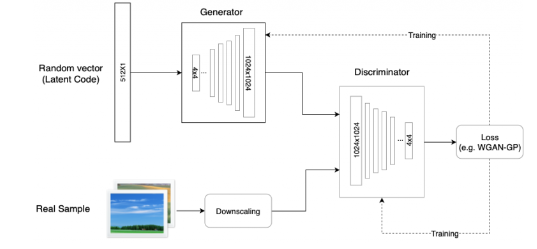

**Arquitectura.**

Generador para dígitos de $28 \times 28$ píxeles.

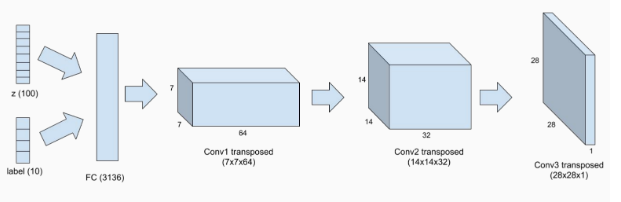

Básicamente es una red convolucional transpuesta (inversa).

### **ProGAN**

Genera imágenes de alta calidad pero, como en la mayoría de los modelos, su capacidad para controlar características específicas de la imagen generada es muy limitada.

En otras palabras, las funciones están enredadas y, por lo tanto, intentar modificar la entrada, aunque sea un poco, generalmente afecta a varias funciones al mismo tiempo.

Una buena analogía para eso serían los genes, en los que cambiar un solo gen podría afectar múltiples rasgos


### **VQGAN y CLIP: Generar imágenes desde frases de texto**

Para más info: [link](https://colab.research.google.com/drive/194OwSkH-3FyLa6X43iR0ctrrBXMwvNYa?usp=sharing#).

In [ ]:
!nvidia-smi

**Instalación de bibliotecas**

In [ ]:
print("Descargando CLIP...")
!git clone https://github.com/openai/CLIP                 &> /dev/null
 
print("Instalando bibliotecas de Python para IA...")
!git clone https://github.com/CompVis/taming-transformers &> /dev/null
!pip install ftfy regex tqdm omegaconf pytorch-lightning  &> /dev/null
!pip install kornia                                       &> /dev/null
!pip install einops                                       &> /dev/null
!pip install wget                                         &> /dev/null
 
print("Instalando bibliotecas para manejo de metadatos...")
!pip install stegano                                      &> /dev/null
!apt install exempi                                       &> /dev/null
!pip install python-xmp-toolkit                           &> /dev/null
!pip install imgtag                                       &> /dev/null
!pip install pillow==7.1.2                                &> /dev/null
 
print("Instalando bibliotecas de Python para creación de vídeos...")
!pip install imageio-ffmpeg                               &> /dev/null
!mkdir steps
print("Instalación finalizada.")

**Descarga del modelo 16384 de ImageNet**

In [ ]:
!curl -L -o vqgan_imagenet_f16_16384.yaml -C - 'https://heibox.uni-heidelberg.de/d/a7530b09fed84f80a887/files/?p=%2Fconfigs%2Fmodel.yaml&dl=1' #ImageNet 16384
!curl -L -o vqgan_imagenet_f16_16384.ckpt -C - 'https://heibox.uni-heidelberg.de/d/a7530b09fed84f80a887/files/?p=%2Fckpts%2Flast.ckpt&dl=1' #ImageNet 16384

**Carga de bibliotecas y definiciones**

In [ ]:
import argparse
import math
from pathlib import Path
import sys
 
sys.path.append('./taming-transformers')
from IPython import display
from base64 import b64encode
from omegaconf import OmegaConf
from PIL import Image
from taming.models import cond_transformer, vqgan
import torch
from torch import nn, optim
from torch.nn import functional as F
from torchvision import transforms
from torchvision.transforms import functional as TF
from tqdm.notebook import tqdm
 
from CLIP import clip
import kornia.augmentation as K
import numpy as np
import imageio
from PIL import ImageFile, Image
from imgtag import ImgTag    # metadatos 
from libxmp import *         # metadatos
import libxmp                # metadatos
from stegano import lsb
import json
ImageFile.LOAD_TRUNCATED_IMAGES = True
 
def sinc(x):
    return torch.where(x != 0, torch.sin(math.pi * x) / (math.pi * x), x.new_ones([]))
 
 
def lanczos(x, a):
    cond = torch.logical_and(-a < x, x < a)
    out = torch.where(cond, sinc(x) * sinc(x/a), x.new_zeros([]))
    return out / out.sum()
 
 
def ramp(ratio, width):
    n = math.ceil(width / ratio + 1)
    out = torch.empty([n])
    cur = 0
    for i in range(out.shape[0]):
        out[i] = cur
        cur += ratio
    return torch.cat([-out[1:].flip([0]), out])[1:-1]
 
 
def resample(input, size, align_corners=True):
    n, c, h, w = input.shape
    dh, dw = size
 
    input = input.view([n * c, 1, h, w])
 
    if dh < h:
        kernel_h = lanczos(ramp(dh / h, 2), 2).to(input.device, input.dtype)
        pad_h = (kernel_h.shape[0] - 1) // 2
        input = F.pad(input, (0, 0, pad_h, pad_h), 'reflect')
        input = F.conv2d(input, kernel_h[None, None, :, None])
 
    if dw < w:
        kernel_w = lanczos(ramp(dw / w, 2), 2).to(input.device, input.dtype)
        pad_w = (kernel_w.shape[0] - 1) // 2
        input = F.pad(input, (pad_w, pad_w, 0, 0), 'reflect')
        input = F.conv2d(input, kernel_w[None, None, None, :])
 
    input = input.view([n, c, h, w])
    return F.interpolate(input, size, mode='bicubic', align_corners=align_corners)
 
 
class ReplaceGrad(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x_forward, x_backward):
        ctx.shape = x_backward.shape
        return x_forward
 
    @staticmethod
    def backward(ctx, grad_in):
        return None, grad_in.sum_to_size(ctx.shape)
 
 
replace_grad = ReplaceGrad.apply
 
 
class ClampWithGrad(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input, min, max):
        ctx.min = min
        ctx.max = max
        ctx.save_for_backward(input)
        return input.clamp(min, max)
 
    @staticmethod
    def backward(ctx, grad_in):
        input, = ctx.saved_tensors
        return grad_in * (grad_in * (input - input.clamp(ctx.min, ctx.max)) >= 0), None, None
 
 
clamp_with_grad = ClampWithGrad.apply
 
 
def vector_quantize(x, codebook):
    d = x.pow(2).sum(dim=-1, keepdim=True) + codebook.pow(2).sum(dim=1) - 2 * x @ codebook.T
    indices = d.argmin(-1)
    x_q = F.one_hot(indices, codebook.shape[0]).to(d.dtype) @ codebook
    return replace_grad(x_q, x)
 
 
class Prompt(nn.Module):
    def __init__(self, embed, weight=1., stop=float('-inf')):
        super().__init__()
        self.register_buffer('embed', embed)
        self.register_buffer('weight', torch.as_tensor(weight))
        self.register_buffer('stop', torch.as_tensor(stop))
 
    def forward(self, input):
        input_normed = F.normalize(input.unsqueeze(1), dim=2)
        embed_normed = F.normalize(self.embed.unsqueeze(0), dim=2)
        dists = input_normed.sub(embed_normed).norm(dim=2).div(2).arcsin().pow(2).mul(2)
        dists = dists * self.weight.sign()
        return self.weight.abs() * replace_grad(dists, torch.maximum(dists, self.stop)).mean()
 
 
def parse_prompt(prompt):
    vals = prompt.rsplit(':', 2)
    vals = vals + ['', '1', '-inf'][len(vals):]
    return vals[0], float(vals[1]), float(vals[2])
 
 
class MakeCutouts(nn.Module):
    def __init__(self, cut_size, cutn, cut_pow=1.):
        super().__init__()
        self.cut_size = cut_size
        self.cutn = cutn
        self.cut_pow = cut_pow
        self.augs = nn.Sequential(
            K.RandomHorizontalFlip(p=0.5),
            # K.RandomSolarize(0.01, 0.01, p=0.7),
            K.RandomSharpness(0.3,p=0.4),
            K.RandomAffine(degrees=30, translate=0.1, p=0.8, padding_mode='border'),
            K.RandomPerspective(0.2,p=0.4),
            K.ColorJitter(hue=0.01, saturation=0.01, p=0.7))
        self.noise_fac = 0.1
 
 
    def forward(self, input):
        sideY, sideX = input.shape[2:4]
        max_size = min(sideX, sideY)
        min_size = min(sideX, sideY, self.cut_size)
        cutouts = []
        for _ in range(self.cutn):
            size = int(torch.rand([])**self.cut_pow * (max_size - min_size) + min_size)
            offsetx = torch.randint(0, sideX - size + 1, ())
            offsety = torch.randint(0, sideY - size + 1, ())
            cutout = input[:, :, offsety:offsety + size, offsetx:offsetx + size]
            cutouts.append(resample(cutout, (self.cut_size, self.cut_size)))
        batch = self.augs(torch.cat(cutouts, dim=0))
        if self.noise_fac:
            facs = batch.new_empty([self.cutn, 1, 1, 1]).uniform_(0, self.noise_fac)
            batch = batch + facs * torch.randn_like(batch)
        return batch
 
 
def load_vqgan_model(config_path, checkpoint_path):
    config = OmegaConf.load(config_path)
    if config.model.target == 'taming.models.vqgan.VQModel':
        model = vqgan.VQModel(**config.model.params)
        model.eval().requires_grad_(False)
        model.init_from_ckpt(checkpoint_path)
    elif config.model.target == 'taming.models.cond_transformer.Net2NetTransformer':
        parent_model = cond_transformer.Net2NetTransformer(**config.model.params)
        parent_model.eval().requires_grad_(False)
        parent_model.init_from_ckpt(checkpoint_path)
        model = parent_model.first_stage_model
    elif config.model.target == 'taming.models.vqgan.GumbelVQ':
        model = vqgan.GumbelVQ(**config.model.params)
        print(config.model.params)
        model.eval().requires_grad_(False)
        model.init_from_ckpt(checkpoint_path)
    else:
        raise ValueError(f'unknown model type: {config.model.target}')
    del model.loss
    return model
 
 
def resize_image(image, out_size):
    ratio = image.size[0] / image.size[1]
    area = min(image.size[0] * image.size[1], out_size[0] * out_size[1])
    size = round((area * ratio)**0.5), round((area / ratio)**0.5)
    return image.resize(size, Image.LANCZOS)

def download_img(img_url):
    try:
        return wget.download(img_url,out="input.jpg")
    except:
        return


**Herramientas para la ejecución:**

Principalmente lo que tendrás que modificar será `textos:`, ahí puedes colocar el o los textos que  quieres generar (separados con `|` ). Es una lista porque puedes poner más de un texto, y así la IA trate de 'mezclar' las imágenes, dándole la misma prioridad a ambos textos.

Para usar una imagen inicial al modelo, solo debes subir un archivo al entorno del Colab (en la sección a la izquierda), y luego modificas `imagen_inicial:` poniendo el nombre exacto del archivo. Ejemplo: `sample.png`

También puedes modificar el modelo cambiando las línea que dice `modelo:`. Actualmente están disponibles 1024, 16384, WikiArt, S-FLCKR y COCO-Stuff. Para activarlos tienes que haberlos descargado primero, y luego puedes simplemente seleccionarlo.

También puedes usar `imagenes_objetivo`, que es básicamente ponerle una o más imágenes que la IA tomará como "meta", cumpliendo la misma función que ponerle un texto. Para poner más de una tienes que usar `|` como separador.

In [ ]:
# @title Parámetros
textos = "two persons eating chocolate" #@param {type:"string"}
ancho =  480#@param {type:"number"}
alto =  480#@param {type:"number"}
modelo = "vqgan_imagenet_f16_16384" #@param ["vqgan_imagenet_f16_16384", "vqgan_imagenet_f16_1024", "wikiart_1024", "wikiart_16384", "coco", "faceshq", "sflckr", "ade20k", "ffhq", "celebahq", "gumbel_8192"]
intervalo_imagenes =  50#@param {type:"number"}
imagen_inicial = None#@param {type:"string"}
imagenes_objetivo = None#@param {type:"string"}
seed = -1#@param {type:"number"}
max_iteraciones = -1#@param {type:"number"}
input_images = ""

nombres_modelos={"vqgan_imagenet_f16_16384": 'ImageNet 16384',"vqgan_imagenet_f16_1024":"ImageNet 1024", 
                 "wikiart_1024":"WikiArt 1024", "wikiart_16384":"WikiArt 16384", "coco":"COCO-Stuff", "faceshq":"FacesHQ", "sflckr":"S-FLCKR", "ade20k":"ADE20K", "ffhq":"FFHQ", "celebahq":"CelebA-HQ", "gumbel_8192": "Gumbel 8192"}
nombre_modelo = nombres_modelos[modelo]     

if modelo == "gumbel_8192":
    is_gumbel = True
else:
    is_gumbel = False

if seed == -1:
    seed = None
if imagen_inicial == "None":
    imagen_inicial = None
elif imagen_inicial and imagen_inicial.lower().startswith("http"):
    imagen_inicial = download_img(imagen_inicial)


if imagenes_objetivo == "None" or not imagenes_objetivo:
    imagenes_objetivo = []
else:
    imagenes_objetivo = imagenes_objetivo.split("|")
    imagenes_objetivo = [image.strip() for image in imagenes_objetivo]

if imagen_inicial or imagenes_objetivo != []:
    input_images = True

textos = [frase.strip() for frase in textos.split("|")]
if textos == ['']:
    textos = []


args = argparse.Namespace(
    prompts=textos,
    image_prompts=imagenes_objetivo,
    noise_prompt_seeds=[],
    noise_prompt_weights=[],
    size=[ancho, alto],
    init_image=imagen_inicial,
    init_weight=0.,
    clip_model='ViT-B/32',
    vqgan_config=f'{modelo}.yaml',
    vqgan_checkpoint=f'{modelo}.ckpt',
    step_size=0.1,
    cutn=64,
    cut_pow=1.,
    display_freq=intervalo_imagenes,
    seed=seed,
)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
if textos:
    print('Using texts:', textos)
if imagenes_objetivo:
    print('Using image prompts:', imagenes_objetivo)
if args.seed is None:
    seed = torch.seed()
else:
    seed = args.seed
torch.manual_seed(seed)
print('Using seed:', seed)

model = load_vqgan_model(args.vqgan_config, args.vqgan_checkpoint).to(device)
perceptor = clip.load(args.clip_model, jit=False)[0].eval().requires_grad_(False).to(device)

cut_size = perceptor.visual.input_resolution
if is_gumbel:
    e_dim = model.quantize.embedding_dim
else:
    e_dim = model.quantize.e_dim

f = 2**(model.decoder.num_resolutions - 1)
make_cutouts = MakeCutouts(cut_size, args.cutn, cut_pow=args.cut_pow)
if is_gumbel:
    n_toks = model.quantize.n_embed
else:
    n_toks = model.quantize.n_e

toksX, toksY = args.size[0] // f, args.size[1] // f
sideX, sideY = toksX * f, toksY * f
if is_gumbel:
    z_min = model.quantize.embed.weight.min(dim=0).values[None, :, None, None]
    z_max = model.quantize.embed.weight.max(dim=0).values[None, :, None, None]
else:
    z_min = model.quantize.embedding.weight.min(dim=0).values[None, :, None, None]
    z_max = model.quantize.embedding.weight.max(dim=0).values[None, :, None, None]

if args.init_image:
    pil_image = Image.open(args.init_image).convert('RGB')
    pil_image = pil_image.resize((sideX, sideY), Image.LANCZOS)
    z, *_ = model.encode(TF.to_tensor(pil_image).to(device).unsqueeze(0) * 2 - 1)
else:
    one_hot = F.one_hot(torch.randint(n_toks, [toksY * toksX], device=device), n_toks).float()
    if is_gumbel:
        z = one_hot @ model.quantize.embed.weight
    else:
        z = one_hot @ model.quantize.embedding.weight
    z = z.view([-1, toksY, toksX, e_dim]).permute(0, 3, 1, 2)
z_orig = z.clone()
z.requires_grad_(True)
opt = optim.Adam([z], lr=args.step_size)

normalize = transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                                 std=[0.26862954, 0.26130258, 0.27577711])

pMs = []

for prompt in args.prompts:
    txt, weight, stop = parse_prompt(prompt)
    embed = perceptor.encode_text(clip.tokenize(txt).to(device)).float()
    pMs.append(Prompt(embed, weight, stop).to(device))

for prompt in args.image_prompts:
    path, weight, stop = parse_prompt(prompt)
    img = resize_image(Image.open(path).convert('RGB'), (sideX, sideY))
    batch = make_cutouts(TF.to_tensor(img).unsqueeze(0).to(device))
    embed = perceptor.encode_image(normalize(batch)).float()
    pMs.append(Prompt(embed, weight, stop).to(device))

for seed, weight in zip(args.noise_prompt_seeds, args.noise_prompt_weights):
    gen = torch.Generator().manual_seed(seed)
    embed = torch.empty([1, perceptor.visual.output_dim]).normal_(generator=gen)
    pMs.append(Prompt(embed, weight).to(device))

def synth(z):
    if is_gumbel:
        z_q = vector_quantize(z.movedim(1, 3), model.quantize.embed.weight).movedim(3, 1)
    else:
        z_q = vector_quantize(z.movedim(1, 3), model.quantize.embedding.weight).movedim(3, 1)
    
    return clamp_with_grad(model.decode(z_q).add(1).div(2), 0, 1)

def add_xmp_data(nombrefichero):
    imagen = ImgTag(filename=nombrefichero)
    imagen.xmp.append_array_item(libxmp.consts.XMP_NS_DC, 'creator', 'VQGAN+CLIP', {"prop_array_is_ordered":True, "prop_value_is_array":True})
    if args.prompts:
        imagen.xmp.append_array_item(libxmp.consts.XMP_NS_DC, 'title', " | ".join(args.prompts), {"prop_array_is_ordered":True, "prop_value_is_array":True})
    else:
        imagen.xmp.append_array_item(libxmp.consts.XMP_NS_DC, 'title', 'None', {"prop_array_is_ordered":True, "prop_value_is_array":True})
    imagen.xmp.append_array_item(libxmp.consts.XMP_NS_DC, 'i', str(i), {"prop_array_is_ordered":True, "prop_value_is_array":True})
    imagen.xmp.append_array_item(libxmp.consts.XMP_NS_DC, 'model', nombre_modelo, {"prop_array_is_ordered":True, "prop_value_is_array":True})
    imagen.xmp.append_array_item(libxmp.consts.XMP_NS_DC, 'seed',str(seed) , {"prop_array_is_ordered":True, "prop_value_is_array":True})
    imagen.xmp.append_array_item(libxmp.consts.XMP_NS_DC, 'input_images',str(input_images) , {"prop_array_is_ordered":True, "prop_value_is_array":True})
    #for frases in args.prompts:
    #    imagen.xmp.append_array_item(libxmp.consts.XMP_NS_DC, 'Prompt' ,frases, {"prop_array_is_ordered":True, "prop_value_is_array":True})
    imagen.close()

def add_stegano_data(filename):
    data = {
        "title": " | ".join(args.prompts) if args.prompts else None,
        "notebook": "VQGAN+CLIP",
        "i": i,
        "model": nombre_modelo,
        "seed": str(seed),
        "input_images": input_images
    }
    lsb.hide(filename, json.dumps(data)).save(filename)

@torch.no_grad()
def checkin(i, losses):
    losses_str = ', '.join(f'{loss.item():g}' for loss in losses)
    tqdm.write(f'i: {i}, loss: {sum(losses).item():g}, losses: {losses_str}')
    out = synth(z)
    TF.to_pil_image(out[0].cpu()).save('progress.png')
    add_stegano_data('progress.png')
    add_xmp_data('progress.png')
    display.display(display.Image('progress.png'))

def ascend_txt():
    global i
    out = synth(z)
    iii = perceptor.encode_image(normalize(make_cutouts(out))).float()

    result = []

    if args.init_weight:
        result.append(F.mse_loss(z, z_orig) * args.init_weight / 2)

    for prompt in pMs:
        result.append(prompt(iii))
    img = np.array(out.mul(255).clamp(0, 255)[0].cpu().detach().numpy().astype(np.uint8))[:,:,:]
    img = np.transpose(img, (1, 2, 0))
    filename = f"steps/{i:04}.png"
    imageio.imwrite(filename, np.array(img))
    add_stegano_data(filename)
    add_xmp_data(filename)
    return result

def train(i):
    opt.zero_grad()
    lossAll = ascend_txt()
    if i % args.display_freq == 0:
        checkin(i, lossAll)
    loss = sum(lossAll)
    loss.backward()
    opt.step()
    with torch.no_grad():
        z.copy_(z.maximum(z_min).minimum(z_max))

i = 0
try:
    with tqdm() as pbar:
        while True:
            train(i)
            if i == max_iteraciones:
                break
            i += 1
            pbar.update()
except KeyboardInterrupt:
    pass

**Generar un vídeo con los resultados.**

Si quieres generar un vídeo con los frames, solo haz click abajo. Puedes modificar el número de FPS, el frame inicial, el último frame, etc.

In [ ]:
init_frame = 1 #Este es el frame donde el vídeo empezará
last_frame = 450 #Puedes cambiar i a el número del último frame que quieres generar. It will raise an error if that number of frames does not exist.

min_fps = 10
max_fps = 30

total_frames = last_frame-init_frame

length = 15 #Tiempo deseado del vídeo en segundos

frames = []
tqdm.write('Generando video...')
for i in range(init_frame,last_frame): #
    filename = f"steps/{i:04}.png"
    frames.append(Image.open(filename))

#fps = last_frame/10
fps = np.clip(total_frames/length,min_fps,max_fps)

from subprocess import Popen, PIPE
p = Popen(['ffmpeg', '-y', '-f', 'image2pipe', '-vcodec', 'png', '-r', str(fps), '-i', '-', '-vcodec', 'libx264', '-r', str(fps), '-pix_fmt', 'yuv420p', '-crf', '17', '-preset', 'veryslow', 'video.mp4'], stdin=PIPE)
for im in tqdm(frames):
    im.save(p.stdin, 'PNG')
p.stdin.close()

print("El vídeo está siendo ahora comprimido, espera...")
p.wait()
print("El vídeo está listo")

**Ver vídeo en el navegador**

Este proceso puede tardar un poco más. Si no quieres esperar, descárgalo ejecutando la celda siguiente en vez de usar esta celda.


In [ ]:
mp4 = open('video.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
display.HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

**Descargar vídeo**

In [ ]:
from google.colab import files
files.download("video.mp4")